### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2021 ###

# Optimal Fantasy Soccer Team #

#### Aditya Patel (appatel5@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [Single Week Model](#2.A.-Single-Week-Model)
    2. [Multi-Week Model](#2.B.-Multi-Week-Model)
1. [Solution](#3.-Solution)
    1. [Single Week Model](#3.A.-Single-Week-Model)
    2. [Multi-Week Model](#3.B.-Multi-Week-Model)
1. [Results and Discussion](#4.-Results-and-discussion)
    1. [Single Week Results](#4.A.-Single-Week-Results)
    2. [Multi-Week Results](#4.B.-Multi-Week-Results)
    3. [Comparison with Human Players](#4.C.-Comparison-with-Human-Players)
    4. [Trade-Off](#4.D.-Trade-Off)
1. [Conclusion](#5.-Conclusion)
1. [Appendix](#6.-Appendix)

## 1. Introduction ##
  
Fantasy Premier League (FPL) is a game where participants have to form a team of actual players playing in the English Premier League (Soccer League). It is a widely popular game which has a player base of around 7-8 million players every year. In this report, we create a model which selects the optimal squad of players each week. The main motivation for this project is to remove the cognitive biases that come into effect when playing such games. For instance, humans are more likely to pick the players that they like even if they are not the best option. Being good at fantasy football may seem to be all about accurately predicting player performances, however even with perfect forecasts the problem of selecting the optimal team is not easy — mostly you decide on a bunch of players, shuffle them in and out of the team until you get the budget right. Introducing strategies involving transfers over several weeks adds another layer of complexity.
  
The idea of the game is that you start off with a budget of 100 million pounds. You are given the task to pick a squad of 15 real-life players who score points for your team based on their performances in their own matches. There are 4 categories of players: Goalkeepers, Defenders, Midfielders, and Forwards. Your squad needs to have 2 goalkeepers, 5 defenders, 5 midfielders, and 3 forwards. Every week you have to choose 11 players that will play for you. The remaining four players are substitutes, which do not score any points for that given week (unless one of your starters does not play in real life). There is a limit of 3 players per Premier League Team. Each week, you get to pick one player from your team to be your captain. This player scores twice the points on that week. There are 38 gameweeks(matchdays) in a season and each week, one can transfer(change) one of their players for free. Any additional transfers cost 4 points each that are deducted from that week's score. 
  
Example of an FPL team:
  
![alt text](https://i0.wp.com/allaboutfpl.com/wp-content/uploads/2020/12/GW16-Wildcard.png?fit=789%2C918&ssl=1 "Logo Title Text 1")

All the rules(including point scoring) are explained in detail on this page: https://fantasy.premierleague.com/help/rules  
  
This project will model a simplified version of the game. First, instead of selecting a squad of 15 players using 100 million pounds, the model will select a team of 11 players using 84 million pounds. This will eliminate the need for substitutes, which are difficult to model. Since we do not plan on using substitutes, we assume that the  4 cheapest players were bought as substitutes. This means that the new budget is: 100 - (4 * 4) = 84 million pounds. Second, instead of having 1 free transfer every week, we will assume that all transfers cost 4 points. In the actual game, there is a system of carry over transfers. If you do not use your free transfer, you are able to make an additional free transfer the following Gameweek. If you do not use this saved free transfer in the following Gameweek, it will be carried over until you do. You can never have more than 1 saved transfer. We will ignore these rules and assume that all transfers cost 4 points. Third, instead of modeling the entire 38 weeks, this report will look at the first 10 weeks of the season. This is mainly due to issues with merging and cleaning data. Additionally, in the actual game, the prices of players change depending on their demand just like the stock market. One can increase their spending budget by selling players for a profit. For this model, we will assume that the budget remains constant even though the player costs will change every week. 
  
The measure that will be used to select a team of players is called "expected points" (projected points). This measure is calculated using underlying numbers (such as number of shots, passes, performances, etc) of previous weeks. This data is readily available online. There are several websites available, each of which uses different algorithms to calculate the expected points.   
  
We will use the data found here: https://github.com/vaastav/Fantasy-Premier-League/tree/master/data/2020-21/gws 
  
This data also contains the actual points scored by each player on a given week. Therefore, we will create a team using expected points and then calculate the actual points scored by that team. 
  
We will first create a model which maximizes the expected points for a given week. We will then create a multi-week model which implements the transfer system.


## 2. Mathematical model ##

### 2.A. Single Week Model ###
  
We will first design an integer programming model that maximizes the expected points for a given week. We will follow the rules and simplifications mentioned in the Introduction section. The captain of the team will be selected after the optimization is complete. Out of the 11 players selected, the player with the highest expected points will be given the captainship. This player's score will be doubled for the given week. 
  
For modeling the position constraints, we will first select a subset of players for each position. We will then limit the number of players that can be chosen from that subset. For instance, the model will first select a subset of players that contains all the defenders. Then, a specified number of players must be chosen from that subset.  
  
For modeling the budget constraint, we will sum the costs of the players. This sum must be less than or equal to the budget.

For modeling the team limit, we will create subsets for each team. A maximum of three players can be selected from each subset.  
  
  
##### Variables:  
Each player is modeled as a binary variable. If a player is selected, the value is 1. If a player is not selected, the value is 0.  
  
##### Contraints:   
The number of Goalkeepers must be equal to one.  
The number of Defenders selected must be equal to the number specified (between 3 and 5).  
The number of Midfielders selected must be equal to the number specified (between 3 and 5).  
The number of Forwards selected must be equal to the number specified (between 1 and 3).   
The sum of the costs of the players must be less than the specified budget.  
A maximum of 3 players can be selected from a single Premier League Team.  
  
The user has to ensure that the number of Defenders, Midfielders, and Forwards add up to 10. This constraint is not coded into the model.  
  
##### Objective:  
The objective is to maximize the expected points while following the above constraints. 
  
##### Standard Form:  


$$
\begin{aligned}
\underset{p}{\text{maximize}} && p^T\cdot eP \\
\text{subject to: } 
&& \displaystyle \sum_{i \in GK} p_i \le 1 \\
&& \displaystyle -\sum_{i \in GK} p_i \le -1 \\
&& \displaystyle \sum_{i \in DEF} p_i \le numDEF \\
&& \displaystyle -\sum_{i \in DEF} p_i \le -numDEF \\
&& \displaystyle \sum_{i \in MID} p_i \le numMID \\
&& \displaystyle -\sum_{i \in MID} p_i \le -numMID \\
&& \displaystyle \sum_{i \in FWD} p_i \le numFWD \\
&& \displaystyle -\sum_{i \in FWD} p_i \le -numFWD \\
&& p^T\cdot cost \le budget \\
&& \displaystyle \sum_{i \in Team_j} p_i \le 3 && \forall j \in T \\
&& p_i \in {0,1} && \forall i=1,\dots,n\\
\end{aligned}
$$

### 2.B. Multi-Week Model ###
  
We will now try to maximize the expected points for a sequence of weeks. This model is the same as the single week model but now there is a tradeoff involved. The model can trade players between consecutive weeks, however, each trade will cost points. This too is an integer programming model. We will follow the rules and simplifications mentioned in the Introduction section. The captain of the team will be selected after the optimization is complete. Each week, out of the 11 players selected, the player with the highest expected points will be given the captainship. This player's score will be doubled for the given week.  
  
Additional variables and constraints are required to keep track of the transfers. We will define a new binary variable z, whose value will be set to 1 if there is a difference between adjacent columns in the player variable. A difference of 0 indicates that the player was not transferred between consecutive weeks.

$-z_{ij} \le p_{ij+1}-p_{ij} \le z_{ij}, \forall i=1,\dots,n, \forall j=1,\dots,w-1$  
  
The remaining constraints are the same as the single week model but with an additional dimension. "i" will refer to the players and "j" will refer to the week.  
  
##### Variables:  
Each player is modeled as a binary variable. If a player is selected, the value is 1. If a player is not selected, the value is 0.  
  
The transfer variable is a binary variable. If a transfer occurs, the value is 1. If a transfer does not occur, the value is 0.  

##### Contraints:   
For each week:  
The number of Goalkeepers must be equal to one.  
The number of Defenders selected must be equal to the number specified (between 3 and 5).  
The number of Midfielders selected must be equal to the number specified (between 3 and 5).  
The number of Forwards selected must be equal to the number specified (between 1 and 3).   
The sum of the costs of the players must be less than the specified budget.  
A maximum of 3 players can be selected from a single Premier League Team.  
  
The user has to ensure that the number of Defenders, Midfielders and Forwards add up to 10. This constraint is not coded into the model.  
    
There is also an extra constraint for transfers, which is explained above.  
  
##### Objective:  
The objective is to maximize the expected points for a sequence of weeks while considering the tradeoff for transfers. 
  
##### Standard Form:  
  

$$
\begin{aligned}
\underset{p}{\text{maximize}} && \displaystyle \sum_{i=1}^{m} p_{.i}^T\cdot eP_{.i} - transferCost(p_{.i}^T\cdot z_{.i}) \\
\text{subject to: } 
&& \displaystyle \sum_{i \in GK} p_{ij} \le 1 && \forall j=1,\dots,w \\
&& \displaystyle -\sum_{i \in GK} p_{ij} \le -1 && \forall j=1,\dots,w \\
&& \displaystyle \sum_{i \in DEF} p_{ij} \le numDEF && \forall j=1,\dots,w \\
&& \displaystyle -\sum_{i \in DEF} p_{ij} \le -numDEF && \forall j=1,\dots,w \\
&& \displaystyle \sum_{i \in MID} p_{ij} \le numMID && \forall j=1,\dots,w \\
&& \displaystyle -\sum_{i \in MID} p_{ij} \le -numMID && \forall j=1,\dots,w \\
&& \displaystyle \sum_{i \in FWD} p_{ij} \le numFWD && \forall j=1,\dots,w \\
&& \displaystyle -\sum_{i \in FWD} p_{ij} \le -numFWD && \forall j=1,\dots,w \\
&& p_{.i}^T\cdot cost_{.i} \le budget && \forall i=1,\dots,w \\
&& \displaystyle \sum_{i \in Team_t} p_{ij} \le 3 && \forall t \in T, \forall j=1,\dots,w \\
&& -z_{ij} \le p_{ij+1}-p_{ij} \le z_{ij} && \forall i=1,\dots,n, \forall j=1,\dots,w-1 \\
&& p_{ij} \in {0,1} && \forall i=1,\dots,n, \forall j=1,\dots,w \\
&& z_{ij} \in {0,1} && \forall i=1,\dots,n, \forall j=1,\dots,w \\
\end{aligned}
$$

## 3. Solution ##

The models can be run using the "Parameters + Data" blocks. Note that the function blocks must be run before running the "Parameters + Data" block.
  
The Single Week Model can be called for any week between 1 and 38.  
The Multi-Week Model can only be run for weeks 1-10. This is because the number of players in the data changed throughout the season (players switched teams, new players were bought, etc.) making it difficult to merge data for different weeks. The Multi-Week model works only when the number of players remains constant for the given sequence of weeks. 

### 3.A. Single Week Model ###

#### Parameters + Data

Parameters can be adjusted here before calling the single week function. 

In [2]:
using JuMP, Gurobi, DataFrames, CSV, NamedArrays

# Parameters

# number of defenders, midfielders, forwards
# minimum for each position: 3, 3, 1
# should add up to 10 (1 goalkeeper is fixed)
numDEF = 4
numMID = 4
numFWD = 2

# budget (1 unit = 100000 pounds)
budget = 840

# week number (between 1 and 38)
week = 11

# Load the data into a dataframe 
# Do not change
df = CSV.read("merged_gw.csv",DataFrame,delim=',', header=1);

# call
singleWeekModel(numDEF, numMID, numFWD, budget, week, df)

Academic license - for non-commercial use only - expires 2021-09-11


Week 11

Optimal Team: 
Bruno Miguel Borges Fernandes
Illan Meslier
Joel Matip
Kevin De Bruyne
Riyad Mahrez
Danny Welbeck
Reece James
Heung-Min Son
Benjamin Mendy
Kurt Zouma
Dominic Calvert-Lewin

Cost: 807.0
Captain: Riyad Mahrez, Total actual points scored by captain: 8
Expected Points: 98.9
Actual Points: 88.0


In [1]:
using JuMP, Gurobi, DataFrames, CSV, NamedArrays

function singleWeekModel(DEF, MID, FWD, budget, week, df)
    # 1 goalkeeper required, M is the total players in a team
    GK = 1
    M = 11
    # max players per premier league team
    limitPerTeam = 3
    

    # Filter out data for current week  
    df = filter(row -> row.GW == week, df)  
    # Number of players 
    N = nrow(df)      

    # Rows containing GK
    GKindicies = findall(df[1:N,2].=="GK")    
    # Rows containing DEF
    DEFindicies = findall(df[1:N,2].=="DEF")   
    # Rows containing MID
    MIDindicies = findall(df[1:N,2].=="MID") 
    # Rows containing FWD
    FWDindicies = findall(df[1:N,2].=="FWD")   
    
    # Player teams 
    teams = unique(df[:,3])                  
    T = length(teams)                   

    # Model
    m = Model(Gurobi.Optimizer)
    set_optimizer_attribute(m, "OutputFlag", 0)
    
    # Binary variables for each player. value is 1 if player is picked, 0 otherwise 
    @variable(m, p[1:N], Bin)             
    # Budget constraint
    @constraint(m, sum(p[i]*df[i,7] for i in 1:N) <= budget)                    
    # Goalkeeper constraint
    @constraint(m, sum(p[i] for i in GKindicies) == GK)        
    # Defender constraint
    @constraint(m, sum(p[i] for i in DEFindicies) == DEF)  
    # Midfielder constraint
    @constraint(m, sum(p[i] for i in MIDindicies) == MID)
    # Forward constraint
    @constraint(m, sum(p[i] for i in FWDindicies) == FWD)   

    # Limit amount of players from one particular team
    for t = 1:T
        teamInd = findall(df[1:N,3].== teams[t])
        @constraint(m, sum(p[i] for i in teamInd) <= limitPerTeam)
    end

    # Maximize expected points
    @objective(m, Max, sum(p[i]*df[i,4] for i in 1:N))

    optimize!(m);

    # Expected points of the team
    EP = value(sum(p.*df[1:N,4])) 
    # Cost of the team
    Cost = value(sum(p.*df[1:N,7]))
    # Actual points scored by the team on the given week
    AP = value(sum(p.*df[1:N,6]))
    
    players = value.(p)                

    # Decide captain 
    max = 0
    maxindex = 0
    maxplayer = ""
    for i in 1:N
        if(players[i] == 1)
            if(df[i,4] > max)
                max = df[i,4]
                maxindex = i
                maxplayer = df[i,1]
            end
        end
    end

    # Add captain points
    EP = EP + max
    AP = AP + df[maxindex,6]

    println()
    println()
    println("Week ", week)
    println()
    println("Optimal Team: ")
    for i in 1:N
        if(players[i] == 1)
            println(df[i,1])
        end
    end
    println()
    println("Cost: ", Cost)
    println("Captain: ", maxplayer,", Total actual points scored by captain: ", df[maxindex,6]*2)
    println("Expected Points: ", round(EP, digits = 2))
    println("Actual Points: ", AP)
    
end;

### 3.B. Multi-Week Model ###

#### Parameters + Data

Parameters can be adjusted here before calling the multi week function.

In [6]:
using JuMP, Gurobi, DataFrames, CSV, NamedArrays

# Parameters

# number of defenders, midfielders, forwards
# minimum for each position: 3, 3, 1
# should add up to 10 (1 goalkeeper is fixed)
numDEF = 4
numMID = 4
numFWD = 2

# budget (1 unit = 100000 pounds)
budget = 840

# transfer cost (max 4)
tc = 4

# total weeks (do not change)
tw = 10

# Load the data into a dataframe 
# Do not change
mw_df = CSV.read("mw_merge_clean.csv",DataFrame,delim=',', header=1);

# Call Function
(eP, aP, cost, players, transfers, p, TEP, TAP, TT) = 
    multiWeekModel(numDEF, numMID, numFWD, budget, tc, tw, mw_df);

# Print any particular week's info

for i in 1:10
    printWeekInfo(i, eP, aP, cost, players, transfers, p, mw_df)  
end




Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 889.4
Total Actual Points: 857.0
Total Transfers: 6.0


//////////////////////////////
WEEK 1

Cost: 815.0
Expected Points: 44.6
Actual Points: 96.0
Captain: Mohamed Salah, 
        Total actual points scored by captain: 40
Transfers: 0.0

Optimal Team: 
Wilfried Zaha
James Rodríguez
Virgil van Dijk
Mohamed Salah
Heung-Min Son
Timothy Castagne
Harry Kane
Kurt Zouma
Dominic Calvert-Lewin
Emiliano Martínez
Andrew Robertson
//////////////////////////////


//////////////////////////////
WEEK 2

Cost: 815.0
Expected Points: 124.5
Actual Points: 152.0
Captain: Heung-Min Son, 
        Total actual points scored by captain: 48
Transfers: 0.0

Optimal Team: 
Wilfried Zaha
James Rodríguez
Virgil van Dijk
Mohamed Salah
Heung-Min Son
Timothy Castagne
Harry Kane
Kurt Zouma
Dominic Calvert-Lewin
Emiliano Martínez
Andrew Robertson
//////////////////////////////


//////////////////////////////
WEEK 3

Cost: 

In [3]:
using JuMP, Gurobi, DataFrames, CSV, NamedArrays

function multiWeekModel(DEF, MID, FWD, budget, transferCost, M, df)

    # Number of players
    N = nrow(df)  
    # Dataframe of expected points
    pts = df[1:N,5:14]       
    # Dataframe of player costs
    cost = df[1:N,15:24]     
    # Dataframe of actual points
    aPts = df[1:N,25:34]
    
    
    # One goalkeeper required
    GK = 1
    
    # Max players per premier league team
    limitPerTeam = 3
    # Player teams 
    teams = unique(df[:,4])             
    T = length(teams)                   

    # Rows containing GK
    GKindicies = findall(df[1:N,3].=="GK")    
    # Rows containing DEF
    DEFindicies = findall(df[1:N,3].=="DEF")   
    # Rows containing MID
    MIDindicies = findall(df[1:N,3].=="MID") 
    # Rows containing FWD
    FWDindicies = findall(df[1:N,3].=="FWD")  
    
    # Model
    m = Model(Gurobi.Optimizer)
    set_optimizer_attribute(m, "OutputFlag", 0)

    # Binary variables for each player. value is 1 if player is picked, 0 otherwise 
    @variable(m, p[1:N,1:M], Bin)           
    # Binary variables for each transfer.  
    @variable(m, x[1:N,1:M-1], Bin)         
    
    # Constraints for each week
    for j = 1:M
        # Budget constraint
        @constraint(m, sum(p[i,j]*cost[i,j] for i in 1:N) <= budget) 
        # Goalkeeper constraint
        @constraint(m, sum(p[i,j] for i in GKindicies) == GK)
        # Defender constraint
        @constraint(m, sum(p[i,j] for i in DEFindicies) == DEF)
        # Midfielder constraint
        @constraint(m, sum(p[i,j] for i in MIDindicies) == MID)
        # Forward constraint
        @constraint(m, sum(p[i,j] for i in FWDindicies) == FWD)  
        
        # Limit amount of players from one particular team
        for t = 1:T
            teamInd = findall(df[1:N,4].== teams[t])
            @constraint(m, sum(p[i,j] for i in teamInd) <= limitPerTeam)
        end
    end

    # To keep track of transfers
    for i = 1:N
        for j = 1:M-1
            @constraint(m, p[i,j+1]-p[i,j] <= x[i,j])
            @constraint(m, p[i,j+1]-p[i,j] >= -x[i,j])
        end
    end
    
    # Maximize expected points
    @objective(m, Max, sum(p[i,j]*pts[i,j] for i in 1:N for j in 1:M) 
        - transferCost*sum(x[i,j] for i in 1:N for j in 1:M-1))

    optimize!(m);

    # Total Expected Points
    TEP = 0                                    
    for i = 1:N
        for j = 1:M
            TEP = TEP + value(p[i,j])*pts[i,j]
        end
    end
    
    # Total Actual Points
    TAP = 0                                    
    for i = 1:N
        for j = 1:M
            TAP = TAP + value(p[i,j])*aPts[i,j]
        end
    end
    
    # Total Transfers
    TT = value(sum(x)/2)                
    # players
    players = value.(p)        
    # transfers
    transfers = value.(x)                       
    
    # Decide captain 
    max = 0
    maxindex = 0
    maxplayer = ""
    for j in 1:M
        max = 0
        maxindex = 0
        maxplayer = ""
        for i in 1:N
            if(players[i,j] == 1)
                if(pts[i,j] > max)
                    max = pts[i,j]
                    maxindex = i
                    maxplayer = df[i,2]
                end
            end
        end
        # Add captain points
        TEP = TEP + max
        TAP = TAP + aPts[maxindex,j]
    end
    

    println()
    println()
    println("Total Expected Points: ", round(TEP, digits=2))
    println("Total Actual Points: ", TAP)
    println("Total Transfers: ", TT)
    
    return(pts, aPts, cost, players, transfers, p, TEP, TAP, TT)
end;

In [4]:
# This function is used to print any particular weeks info
# Run this after calling the multi-week function

function printWeekInfo(j, pts, aPts, cost, players, x, p, df)     
    C = 0
    EP = 0
    AP = 0
    T = 0
    N = nrow(pts)
    for i in 1:N
        EP = EP + value(p[i,j])*pts[i,j]
        AP = AP + value(p[i,j])*aPts[i,j]
        C = C + value(p[i,j])*cost[i,j]
        if (j != 1)
            T = T + value(x[i,j-1])
        end
    end
    
    max = 0
    maxindex = 0
    maxplayer = ""
    for i in 1:N
        if(players[i,j] == 1)
            if(pts[i,j] > max)
                max = pts[i,j]
                maxindex = i
                maxplayer = df[i,2]
            end
        end
    end
    # Add captain points
    EP = EP + max
    AP = AP + aPts[maxindex,j]
    
    println()
    println()
    println("//////////////////////////////")
    println("WEEK ", j)
    println()
    println("Cost: ", C)
    println("Expected Points: ", EP)
    println("Actual Points: ", AP)
    println("Captain: ", maxplayer,", 
        Total actual points scored by captain: ", aPts[maxindex,j]*2)
    println("Transfers: ", T/2)
    println()
    println("Optimal Team: ")

    for i in 1:N
        if(players[i,j] == 1)
            println(df[i,2])
        end
    end

    println("//////////////////////////////")
end

printWeekInfo (generic function with 1 method)

In [5]:
# This function is used to get a  week's summary
# Run this after calling the multi-week function

function weeklySummary(j, pts, aPts, cost, players, x, p, df)     
    C = 0
    EP = 0
    AP = 0
    T = 0
    N = nrow(pts)
    for i in 1:N
        EP = EP + value(p[i,j])*pts[i,j]
        AP = AP + value(p[i,j])*aPts[i,j]
        C = C + value(p[i,j])*cost[i,j]
        if (j != 1)
            T = T + value(x[i,j-1])
        end
    end
    
    max = 0
    maxindex = 0
    maxplayer = ""
    for i in 1:N
        if(players[i,j] == 1)
            if(pts[i,j] > max)
                max = pts[i,j]
                maxindex = i
                maxplayer = df[i,2]
            end
        end
    end
    # Add captain points
    EP = EP + max
    AP = AP + aPts[maxindex,j]
    
    return(C, EP, AP, T/2)
end

weeklySummary (generic function with 1 method)

## 4. Results and discussion ##

### 4.A. Single Week Results ###

In [7]:
using JuMP, Gurobi, DataFrames, CSV, NamedArrays

# Parameters

# number of defenders, midfielders, forwards
# minimum for each position: 3, 3, 1
# should add up to 10 (1 goalkeeper is fixed)
numDEF = 4
numMID = 4
numFWD = 2

# budget (1 unit = 100000 pounds)
budget = 840

# week number (between 1 and 38)
week = 11

# Load the data into a dataframe 
# Do not change
df = CSV.read("merged_gw.csv",DataFrame,delim=',', header=1);

# call
singleWeekModel(numDEF, numMID, numFWD, budget, week, df)

Academic license - for non-commercial use only - expires 2021-09-11


Week 11

Optimal Team: 
Bruno Miguel Borges Fernandes
Illan Meslier
Joel Matip
Kevin De Bruyne
Riyad Mahrez
Danny Welbeck
Reece James
Heung-Min Son
Benjamin Mendy
Kurt Zouma
Dominic Calvert-Lewin

Cost: 807.0
Captain: Riyad Mahrez, Total actual points scored by captain: 8
Expected Points: 98.9
Actual Points: 88.0


#### Solution

The parameters can be adjusted above before running the block. With the given parameters, the model produces a team with 98.9 expected points in gameweek 11. Comparing with actual points, this same team would have scored 88 points in gameweek 11 of the 2020/2021 Premier League Season. Changing the formation and budget would result in a different solution.

### 4.B. Multi-Week Results ###

In [8]:
using JuMP, Gurobi, DataFrames, CSV, NamedArrays

# Parameters

# number of defenders, midfielders, forwards
# minimum for each position: 3, 3, 1
# should add up to 10 (1 goalkeeper is fixed)
numDEF = 4
numMID = 4
numFWD = 2

# budget (1 unit = 100000 pounds)
budget = 840

# transfer cost (max 4)
tc = 4

# total weeks (do not change)
tw = 10

# Load the data into a dataframe 
# Do not change
mw_df = CSV.read("mw_merge_clean.csv",DataFrame,delim=',', header=1);

# Call Function
multiWeekModel(numDEF, numMID, numFWD, budget, tc, tw, mw_df);

Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 889.4
Total Actual Points: 857.0
Total Transfers: 6.0


#### Solution ####
The parameters can be adjusted above before running the block. With the given parameters, the model produces a solution that has 889.4 total expected points at the end of week 10. For each week the actual points were also calculated. This solution would have scored 857 points at the end of week 10 in the 2020/2021 Premier League Season. The week by week details of the team can be found in section 3.2.
  
  
### 4.C. Comparison with Human Players ###
With all the simplifications that were made to the problem, it is unfair to compare the results directly to human players. However, by doing so we can get a reasonable estimate of the model's performance. 
Unfortunately, all the human player data was erased from the official website as a new season is about to start. Usually, the week to week data is available for all the 8 million human players. While not quite the best, I was able to find the week by week data for the person who finished in 4th place overall out of approximately 8 million people who participated. (Source: https://allaboutfpl.com/2021/05/meet-fpl-world-no-4-harvey-discussing-about-his-remarkable-2020-21-fpl-season/).   
This data is shown in the image below.  

![alt text](https://i0.wp.com/allaboutfpl.com/wp-content/uploads/2021/05/image-25.png?resize=640%2C978&ssl=1 "Logo Title Text 1")

In this image, the GP column refers to Gameweek Points, GR refers to the Gameweek Rank, TM refers to the number of transfers made, OP refers to Overall Points, and OR refers to Overall Rank. As seen in the image, at the end of week 10, this player had a total of 679 points and an overall rank of 4850 out of ~8 million (Top 0.06 %).  
  
This means that at the end of gameweek 10, the model managed to outscore this human by 178 points. It could be argued that all the simplifications, mentioned in the introduction, placed the model at a disadvantage. Furthermore, the actual game has 4 boosts that human players can use throughout the season to enhance their scores, the details of which we will ignore for now. Despite all of this, the model managed to considerably outscore this person.  
  
One possible reason for this could be that the model had access to the data for all 10 weeks before solving the problem. Usually, the "expected points" measure can be calculated accurately only for the next 2-3 weeks. For instance, a human building a team in week 2 would not have accurate "expected points" data for week 10. Furthermore, the "expected points" measure usually becomes more accurate as the season progresses and more data on players is available. 
  
A future improvement could involve making a model which only has access to the next 2-3 weeks of "expected points" data. This would mimic a human player more accurately. 


### 4.D. Trade-Off ###
  
While making the model, we made the simplification that all transfers cost 4 points. In the actual game, you get 1 free transfer every week. Additional transfers cost 4 points each. There is also a system of carry over transfers. If you do not use your free transfer, you can make an additional free transfer the following Gameweek. If you do not use this saved free transfer in the following Gameweek, it will be carried over until you do. You can never have more than 1 saved transfer. 
  
It is not possible to have free transfers in this model. However, we can try reducing the transfer cost to see how the results vary. 

In [9]:
using JuMP, Gurobi, DataFrames, CSV, NamedArrays

# Parameters

# number of defenders, midfielders, forwards
# minimum for each position: 3, 3, 1
# should add up to 10 (1 goalkeeper is fixed)
numDEF = 4
numMID = 4
numFWD = 2

# budget (1 unit = 100000 pounds)
budget = 840

# total weeks (do not change)
tw = 10

# Load the data into a dataframe 
# Do not change
mw_df = CSV.read("mw_merge_clean.csv",DataFrame,delim=',', header=1);

expectedP = zeros(9)
actualP = zeros(9)
transfersW = zeros(9)
x = 1
# transfer cost
tc = [5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1]

# Call Function

for i in tc
    (eP, aP, cost, players, transfers, p, expectedP[x], actualP[x], 
        transfersW[x]) = multiWeekModel(numDEF, numMID, numFWD, budget, 
        i, tw, mw_df);
    x = x + 1;
end
;

Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 880.4
Total Actual Points: 849.0
Total Transfers: 5.0
Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 889.4
Total Actual Points: 857.0
Total Transfers: 6.0
Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 889.4
Total Actual Points: 857.0
Total Transfers: 6.0
Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 889.4
Total Actual Points: 857.0
Total Transfers: 6.0
Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 895.6
Total Actual Points: 865.0
Total Transfers: 7.0
Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 900.7
Total Actual Points: 871.0
Total Transfers: 8.0
Academic license - for non-commercial use only - expires 2021-09-11


Total Expected Points: 917.6
Total Actual Points

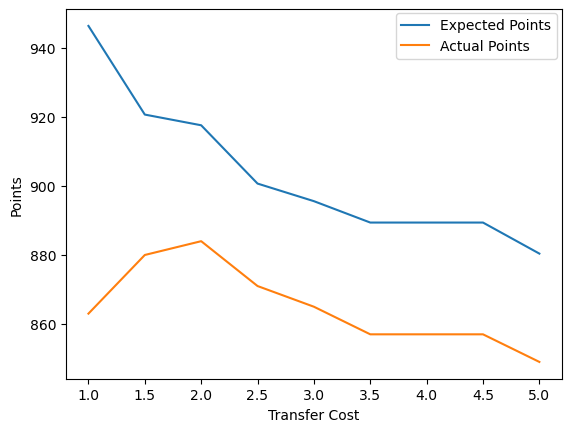

PyObject <matplotlib.legend.Legend object at 0x1593c2a90>

In [10]:
# plot the points scored at different transfer costs
using PyPlot
xlabel("Transfer Cost")
ylabel("Points")
plot(tc, expectedP,label="Expected Points");
plot(tc, actualP, label="Actual Points");
legend(bbox_to_anchor=[0.99,0.99],loc=0,borderaxespad=0)

As expected, the total expected points increased with a decrease in transfer costs. However, the same is not true for actual points.  
Surprisingly, decreasing the transfer cost beyond a certain point did not result in more actual points. Maximum points were achieved with a transfer cost of 2. This could be because we are looking at a pretty small dataset. It would be interesting to see if similar behavior is observed over the course of an entire season. 

## 5. Conclusion ##

In this report, we tried to model a simplified version of a popular fantasy soccer game called Fantasy Premier League. The model managed to comfortably outscore the person who finished 4th overall, out of approximately 8 million people, over the first 10 weeks. Varying the trade-off cost showed that decreasing the transfer cost does not necessarily equate to more points. In the future, changes could be made to remove some of the simplifications. This would involve adding the "one free transfer per week" rule into the model, as well as varying budgets over the course of the season. Another modification could be to make it so the model only has access to the next 2-3 weeks of "expected points" data. This would mimic a human player more accurately. 

## 6. Appendix ##
  
Data was merged using the following code.

In [ ]:
using JuMP, Gurobi, DataFrames, CSV, NamedArrays

df3 = CSV.read("gw1.csv",DataFrame,delim=',', header=1);

# add expected points columns
for i in 2:10
    r = "gw" * string(i) * ".csv"
    GW_raw = CSV.read(r,DataFrame,delim=',', header=1);
    GW = select(GW_raw, [:element, :xP])
    df3 = innerjoin(df3, GW, on = :element, makeunique=true)
    
end

# Add GW1 Value
gw1 = CSV.read("gw1_OG.csv",DataFrame,delim=',', header=1);
gw1_tp = select(gw1, [:element, :value])
df3 = innerjoin(df3, gw1_tp, on = :element, makeunique=true)

# add value(cost) columns
for i in 2:10
    r = "gw" * string(i) * ".csv"
    GW_raw = CSV.read(r,DataFrame,delim=',', header=1);
    GW = select(GW_raw, [:element, :value])
    df3 = innerjoin(df3, GW, on = :element, makeunique=true)
    
end

# Add GW1 Total Points
gw1 = CSV.read("gw1_OG.csv",DataFrame,delim=',', header=1);
gw1_tp = select(gw1, [:element, :total_points])
df3 = innerjoin(df3, gw1_tp, on = :element, makeunique=true)

# add total points columns
for i in 2:10
    r = "gw" * string(i) * ".csv"
    GW_raw = CSV.read(r,DataFrame,delim=',', header=1);
    GW = select(GW_raw, [:element, :total_points])
    df3 = innerjoin(df3, GW, on = :element, makeunique=true)
    
end
CSV.write("mw_merge_clean.csv", df3)